In [1]:
df1<-read.csv("processed_data.csv")

In [2]:
head(df1)

id,title,production_name,country_name,release_year,release_month,genre_name,budget,revenue,runtime,vote_average,vote_count
19995,Avatar,Ingenious Film Partners,United States of America,2009,December,Action,237000000,2787965087,162,7.2,11800
285,Pirates of the Caribbean: At World's End,Walt Disney Pictures,United States of America,2007,May,Adventure,300000000,961000000,169,6.9,4500
206647,Spectre,Columbia Pictures,United Kingdom,2015,October,Action,245000000,880674609,148,6.3,4466
49026,The Dark Knight Rises,Legendary Pictures,United States of America,2012,July,Action,250000000,1084939099,165,7.6,9106
49529,John Carter,Walt Disney Pictures,United States of America,2012,March,Action,260000000,284139100,132,6.1,2124
559,Spider-Man 3,Columbia Pictures,United States of America,2007,May,Fantasy,258000000,890871626,139,5.9,3576


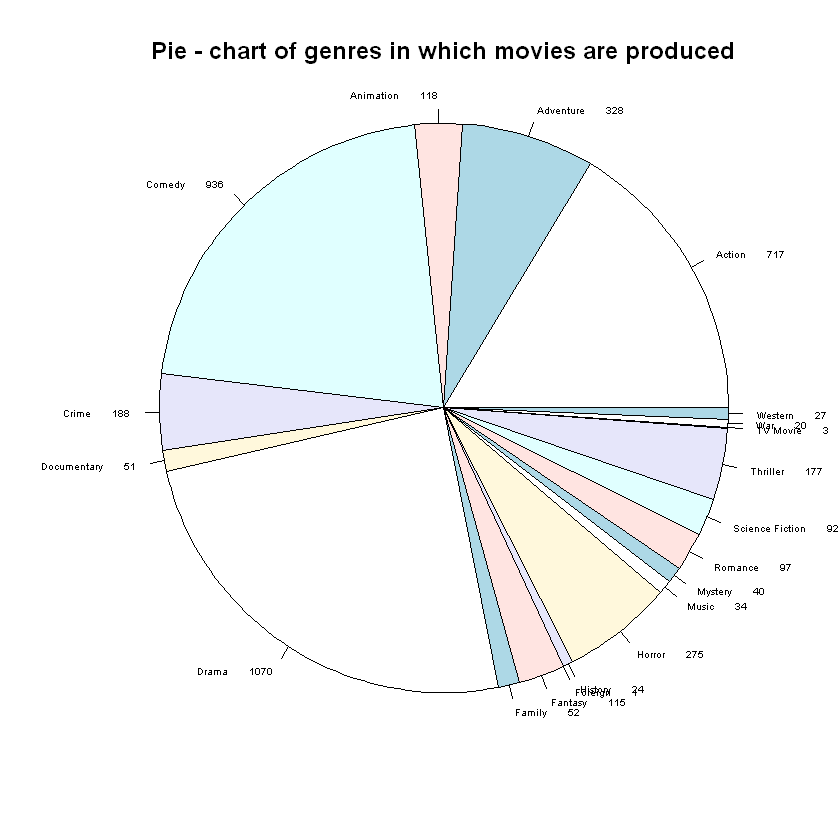

In [3]:
# A pi-chart distribution of the genres in which movies are produced.
mytable<-table(df1$genre_name)
lbls <- paste(names(mytable), "   ", mytable, sep="  ")
pie(mytable, labels = lbls,main="Pie - chart of genres in which movies are produced", cex =0.5, radius = 1)

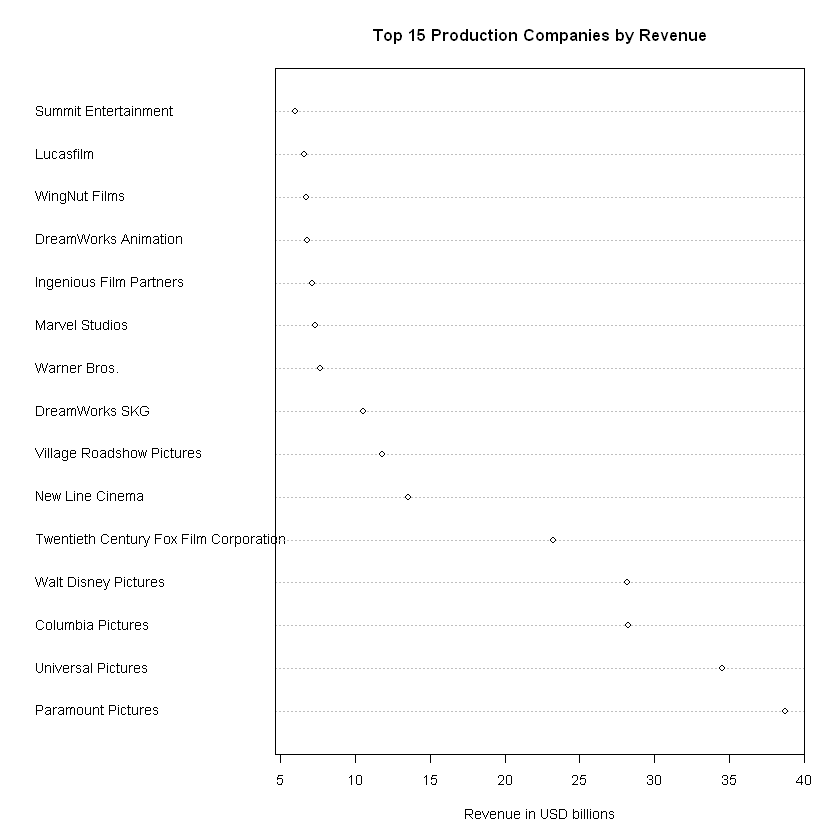

In [4]:
#Making a dot plot for revenues of production companies
df2<-subset(df1,select=c("production_name","revenue"))
df3<-aggregate(df2$revenue, by=list(Production_Name=df2$production_name), FUN=sum)
library(plyr)
df3 <- head(arrange(df3,desc(x)), n = 15)
colnames(df3)[2] <- "Revenue"
df3$Revenue <-  df3$Revenue/1000000000
dotchart(df3$Revenue,labels=df3$Production_Name,cex=.7,main="Top 15 Production Companies by Revenue", xlab="Revenue in USD billions")

production_name,loss_count,success_count,success_rate
United Artists,10,53,84.12698
Walt Disney Pictures,17,90,84.11215
Twentieth Century Fox Film Corporation,28,139,83.23353
DreamWorks SKG,10,46,82.14286
New Line Cinema,26,117,81.81818
Universal Pictures,45,199,81.55738
Village Roadshow Pictures,13,53,80.30303
Columbia Pictures,40,142,78.02198
Summit Entertainment,10,33,76.74419
Paramount Pictures,62,202,76.51515


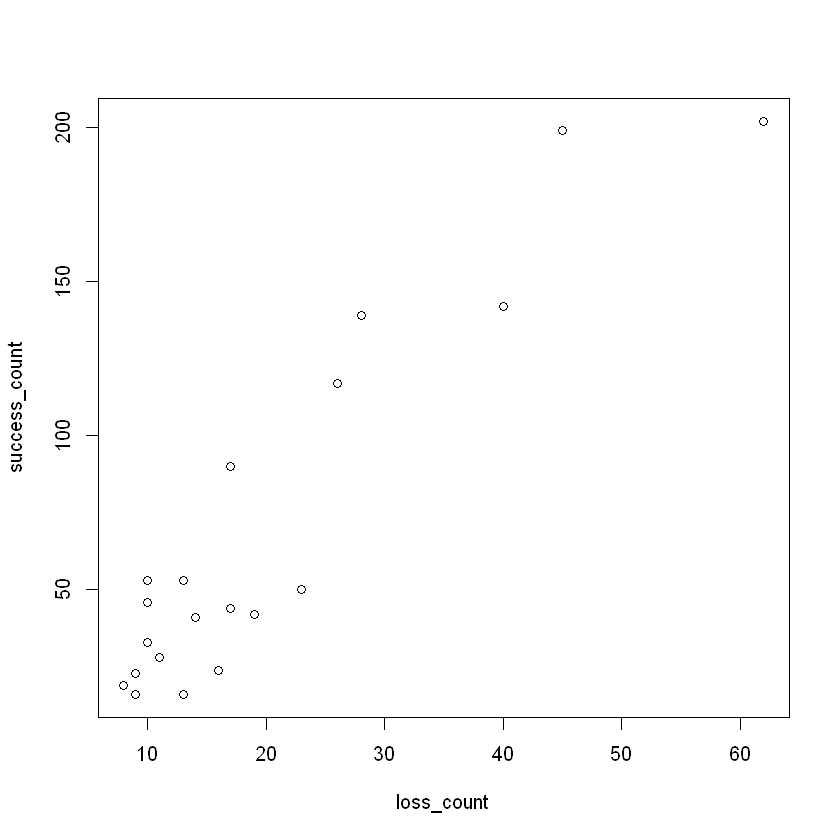

In [56]:
#List of production companies with highest number of losses
library(dplyr)
df4<-df1[df1$revenue < df1$budget,]
df4<-df4[(df4[,10]>0),]
df4 <- group_by(df4,production_name)
df4<-summarise(df4,count=n())
df4 <- head(arrange(df4,desc(count)), n = 25)
colnames(df4)[2]<-"loss_count"
#List of production companies with highest number of successes
df5<-df1[df1$revenue > df1$budget,]
df5<-df5[(df5[,10]>0),]
df5 <- group_by(df5,production_name)
df5<-summarise(df5,count=n())
df5 <- head(arrange(df5,desc(count)), n = 25)
colnames(df5)[2]<-"success_count"
df6<-merge(df4,df5,by="production_name")
#Calculating the success rate of production companies
df6=transform(df6,success_rate = success_count/(loss_count+success_count)*100)
df6 <-(arrange(df6,desc(success_rate)))
df6
with(df6,plot(loss_count,success_count))